In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')

In [ ]:
def plot_data(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, y, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="plasma")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, y)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

In [ ]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
df = pd.read_csv("datasets/creditcard.csv")

In [ ]:
df.head(80)

In [ ]:
df = df.drop(["Time", "Amount"], axis=1)
X = df.drop("Class", axis=1)
y = df["Class"].copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=80, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

In [ ]:
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [ ]:
X_reduced = X[list(feature_importances_sorted.head(10).index)].copy()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

Label 0 has 71118 samples - 156 are malicious samples
Label 1 has 46621 samples - 4 are malicious samples
Label 2 has 147649 samples - 48 are malicious samples
Label 3 has 303 samples - 261 are malicious samples
Label 4 has 19116 samples - 23 are malicious samples


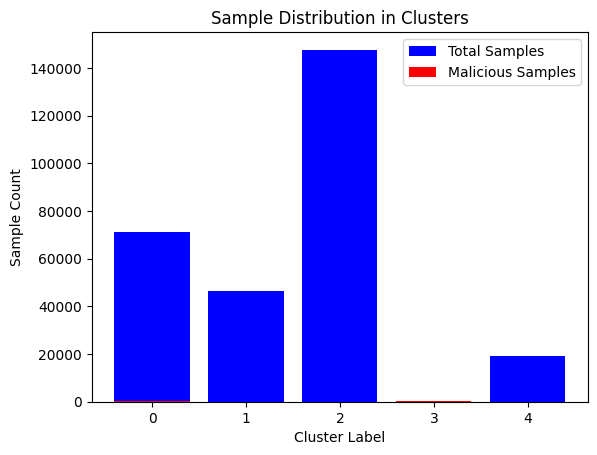

In [24]:
import matplotlib.pyplot as plt

cluster_counts = Counter(clusters.tolist())
bad_cluster_counts = Counter(clusters[y == 1].tolist())

for key in sorted(cluster_counts.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, cluster_counts[key], bad_cluster_counts[key]))

cluster_labels = sorted(cluster_counts.keys())
counts = [cluster_counts[key] for key in cluster_labels]
bad_counts = [bad_cluster_counts[key] for key in cluster_labels]

fig, ax = plt.subplots()

ax.bar(cluster_labels, counts, label='Total Samples', color='b')

ax.bar(cluster_labels, bad_counts, label='Malicious Samples', color='r')

ax.set_xlabel('Cluster Label')
ax.set_ylabel('Sample Count')
ax.set_title('Sample Distribution in Clusters')
ax.legend()

plt.show()




In [25]:
print("Purity Score:", purity_score(y, clusters))
print("Shiloutte: ", metrics.silhouette_score(X_reduced, clusters, sample_size=10000))
print("Calinski harabasz: ", metrics.calinski_harabasz_score(X_reduced, clusters))

Purity Score: 0.9990414561439852
Shiloutte:  0.1441067020713584
Calinski harabasz:  29230.410042368065
